In [1]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, GRU, SimpleRNN
from keras.optimizers import RMSprop
# from keras.engine import Model
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Bidirectional

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rnn_classif_network(T, D):
    inputs = Input(name='input', shape=[T, D])
    layer = SimpleRNN(50, return_sequences=False)(inputs)
    predictions = Dense(10, activation='softmax')(layer)
    network = Model(inputs=inputs, outputs=predictions)
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

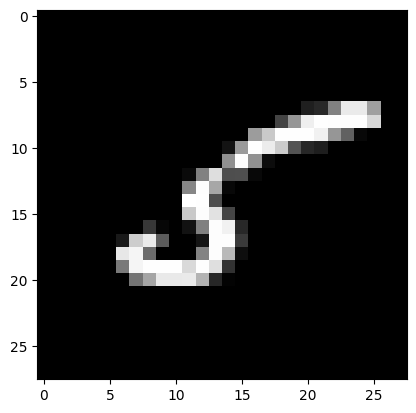

In [5]:
plt.imshow(x_train[11,:,:], cmap='gray')
plt.show()

### 1. Completez le code suivant

(60000, 28, 28)


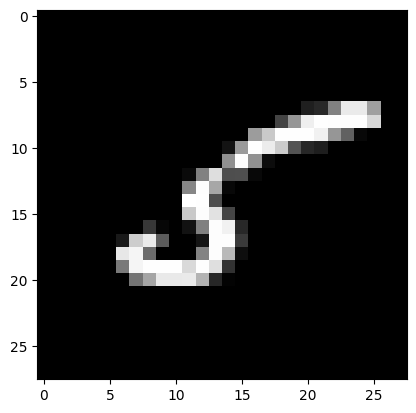

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 lstm_18 (LSTM)              (None, 64)                23808     
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
625/625 [==============================] - 4s 6ms/step - loss: 30.9626 - accuracy: 0.1375 - val_loss: 15.9533 - val_accuracy: 0.1650
Epoch 2/3
625/625 [==============================] - 4s 6ms/step - loss: 7.1406 - accuracy: 0.2031 - val_loss: 4.4990 - val_accuracy: 0.1610
Epoch 3/3
625/625 [===============

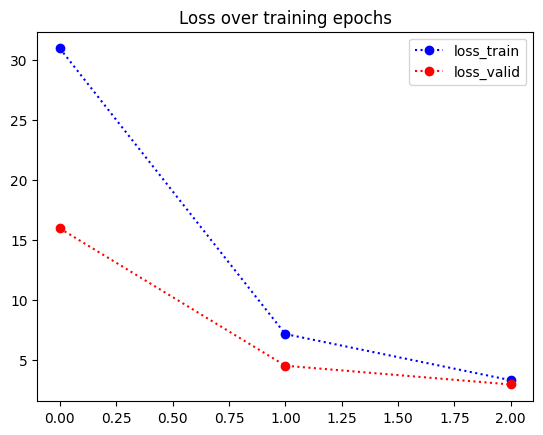

313/313 [==============================] - 1s 3ms/step - loss: 3.1551 - accuracy: 0.2437

TEST LOSS AND ACCURACY =  [3.1550838947296143, 0.24369999766349792]


In [30]:
if __name__ == '__main__':
    # x are of dimension nb_data 28 x 28 which is the size of each image
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(x_train.shape)
    # exemple pour visualiser la 11 ème image
    plt.imshow(x_train[11,:,:], cmap='gray')
    plt.show()

    nb_classes = 10
    nb_train, T, D = x_train.shape
    nb_test, T, D = x_test.shape
    
    # on réserve une base de valid
    FIN_APP = 20000
    DEBUT_VALID = 59000
    x_valid = x_train[DEBUT_VALID:,:,:]
    y_valid = y_train[DEBUT_VALID:]
    x_train = x_train[:FIN_APP,:,:]
    y_train = y_train[:FIN_APP]
    ###########################################################################
    # passage en encodage one-hot vector
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    y_valid = to_categorical(y_valid)
    ###########################################################################
    # Déclaration et compilation du réseau recurrent
    inputs = Input(shape=(28,28))
    x = LSTM(64,activation="relu")(inputs)
    outputs = Dense(10,activation="softmax")(x)
    le_reseau = Model(inputs=inputs,outputs=outputs)
    le_reseau.summary()
    le_reseau.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    ###########################################################################
    # Apprentissage du réseau avec batch de None
    # Base de validation testee à la fin de chaque époque
    # nb_epch = 3 pour le moment
    # la méthode renvoie l'historique de l'apprentissage
    Enregistrement = le_reseau.fit(x_train,y_train,validation_data=(x_valid, y_valid),epochs=3,batch_size=None, callbacks=[ModelCheckpoint("checkpoint.model.keras",save_freq='epoch',monitor='val_loss', save_weights_only=True, save_best_only=True)])
    
    ###########################################################################
    # On visualise l'historique de l'apprentissage
    loss_train = Enregistrement.history['loss']
    loss_valid = Enregistrement.history['val_loss']
    metric_train = Enregistrement.history['accuracy']
    metric_valid = Enregistrement.history['val_accuracy']
    plt.plot(loss_train,"b:o", label = "loss_train")
    plt.plot(loss_valid,"r:o", label = "loss_valid")
    plt.title("Loss over training epochs")
    plt.legend()
    plt.show()

    ############################################################################
    #on teste les performances du réseau entrainé
    loss_test = le_reseau.evaluate(x=x_test,y=y_test)
    print("\nTEST LOSS AND ACCURACY = ", loss_test)


### 2. En vous inspirant du réseau de la première question,  completez la fonction rnn_classif_network et completez le code suivant :

In [35]:
def rnn_classif_network():   
    inputs = Input(shape=(28,28))
    layer = SimpleRNN(64,activation="relu")(inputs)
    predictions = Dense(10,activation="softmax")(layer)
    network = Model(inputs=inputs,outputs=predictions)
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

(60000, 28, 28)


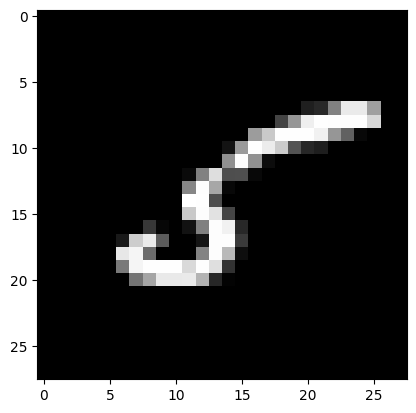

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 2.3749 - accuracy: 0.4110 - val_loss: 1.2416 - val_accuracy: 0.5320
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 1.3334 - accuracy: 0.5320 - val_loss: 1.1117 - val_accuracy: 0.5870
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 1.1354 - accuracy: 0.6000 - val_loss: 0.9019 - val_accuracy: 0.6600
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.9569 - accuracy: 0.6712 - val_loss: 0.7981 - val_accuracy: 0.7240
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.8308 - accuracy: 0.7159 - val_loss: 0.7175 - val_accuracy: 0.7670
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.7533 - accuracy: 0.7477 - val_loss: 0.5927 - val_accuracy: 0.8170
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6875 - accuracy: 0.7659 - val_loss: 0.5928 - val_accuracy: 0.8150
Epoch 

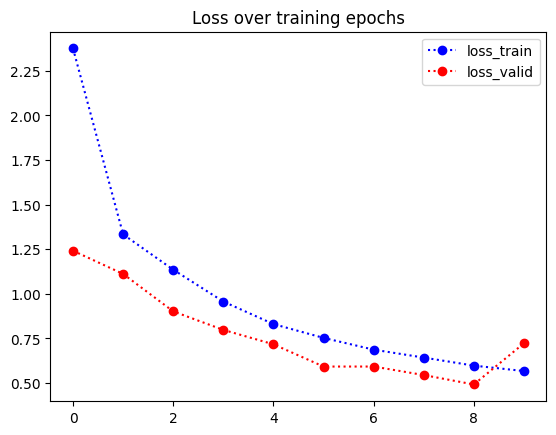

313/313 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.7936

TEST LOSS AND ACCURACY =  [0.6707546710968018, 0.7936000227928162]


In [37]:
if __name__ == '__main__':
    # x are of dimension nb_data 28 x 28 which is the size of each image
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(x_train.shape)
    # exemple pour visualiser la 11 ème image
    plt.imshow(x_train[11,:,:], cmap='gray')
    plt.show()

    nb_classes = 10
    nb_train, T, D = x_train.shape
    nb_test, T, D = x_test.shape
    # on réserve une base de valid
    FIN_APP = 20000
    DEBUT_VALID = 59000
    x_valid = x_train[DEBUT_VALID:,:,:]
    y_valid = y_train[DEBUT_VALID:]
    x_train = x_train[:FIN_APP,:,:]
    y_train = y_train[:FIN_APP]
    ###########################################################################
    # passage en encodage one-hot vector
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    y_valid = to_categorical(y_valid)
    ###########################################################################
    # Déclaration et compilation du réseau recurrent : utilisez un LSTM
    le_reseau = rnn_classif_network()
    ###########################################################################
    # Apprentissage du réseau avec batch de 10
    # Base de validation testee à la fin de chaque époque
    # nb_epch = 10 pour le moment
    # la méthode renvoie l'historique de l'apprentissage
    Enregistrement = le_reseau.fit(x_train,y_train,validation_data=(x_valid, y_valid),epochs=10,batch_size=None, callbacks=[ModelCheckpoint("checkpoint.model.keras",save_freq='epoch',monitor='val_loss', save_weights_only=True, save_best_only=True)])

    ###########################################################################
    # On visualise l'historique de l'apprentissage
    loss_train = Enregistrement.history['loss']
    loss_valid = Enregistrement.history['val_loss']
    metric_train = Enregistrement.history['accuracy']
    metric_valid = Enregistrement.history['val_accuracy']
    plt.plot(loss_train,"b:o", label = "loss_train")
    plt.plot(loss_valid,"r:o", label = "loss_valid")
    plt.title("Loss over training epochs")
    plt.legend()
    plt.show()

    ############################################################################
    #on teste les performances du réseau entrainé
    loss_test = le_reseau.evaluate(x=x_test,y=y_test)
    print("\nTEST LOSS AND ACCURACY = ", loss_test)

# Meilleur modèle

In [40]:
# Définir le reseau LSTM
def lstm_classif_network():   
    inputs = Input(shape=(28,28))
    layer = LSTM(64,activation="relu")(inputs)
    predictions = Dense(10,activation="softmax")(layer)
    network = Model(inputs=inputs,outputs=predictions)
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return network
net = lstm_classif_network()
cp = ModelCheckpoint("best.h5", verbose=1, save_best_only=True)
callback_list = [cp]
history = net.fit(x_train, y_train, epochs=10, validation_data=[x_valid, y_valid],
                  callbacks=callback_list, verbose=0)
print(history.history["loss"])

# on teste les performances du réseau entrainé
loss_train = loss_test = le_reseau.evaluate(x=x_train,y=y_train)
print("\nTRAIN LOSS AND ACCURACY = ", loss_train)
net.load_weights("best.h5")
loss_test = net.evaluate(x_test, y_test)


Epoch 1: val_loss improved from inf to 29.83873, saving model to best.h5

Epoch 2: val_loss improved from 29.83873 to 5.89785, saving model to best.h5

Epoch 3: val_loss improved from 5.89785 to 2.64958, saving model to best.h5

Epoch 4: val_loss improved from 2.64958 to 2.59746, saving model to best.h5

Epoch 5: val_loss did not improve from 2.59746

Epoch 6: val_loss improved from 2.59746 to 2.09874, saving model to best.h5

Epoch 7: val_loss did not improve from 2.09874

Epoch 8: val_loss did not improve from 2.09874

Epoch 9: val_loss improved from 2.09874 to 2.03554, saving model to best.h5

Epoch 10: val_loss did not improve from 2.03554
[46.834251403808594, 20.465429306030273, 3.3227245807647705, 2.946612596511841, 3.3301613330841064, 2.7728021144866943, 2.404182195663452, 2.379337787628174, 2.946078300476074, 2.8863468170166016]
625/625 [==============================] - 1s 1ms/step - loss: 0.5849 - accuracy: 0.8053

TRAIN LOSS AND ACCURACY =  [0.5848695039749146, 0.8052999973

In [41]:
print(len(x_train))

20000


In [42]:
print(len(x_valid))

1000
